In [1]:
from keras.datasets import cifar100

In [2]:
(x_train, y_train),(x_test,y_test) = cifar100.load_data()
from skimage import color

x_train = color.rgb2gray(x_train)
print(x_train.shape)
x_test = color.rgb2gray(x_test)
print(x_test.shape)

169017344/169001437 [==============================] - 2s 0us/step
(50000, 32, 32)
(10000, 32, 32)


In [3]:
x = x_test

In [4]:
x_train = x_train.reshape(50000,1024)
x_test = x_test.reshape(10000,1024)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [5]:
x_train /= 255
x_test/= 255

In [6]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train,100)
y_test = to_categorical(y_test,100)

In [7]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Dense
Model = Sequential()
Model.add(Dense(512,activation = 'relu',input_shape = (1024,)))
Model.add(Dropout(0.2))
Model.add(Dense(512,activation = 'relu'))
Model.add(Dropout(0.2))
Model.add(Dense(512,activation = 'relu'))
Model.add(Dropout(0.2))
Model.add(Dense(512,activation = 'relu'))
Model.add(Dropout(0.2))
Model.add(Dense(100,activation='softmax'))
Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               524800    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 512)               2

In [8]:
from tensorflow.keras.optimizers import RMSprop
Model.compile(loss = 'categorical_crossentropy', optimizer = 'RMSprop', metrics = ['accuracy'])

In [10]:
history = Model.fit(x_train,y_train,batch_size= 128,epochs = 100, verbose = 1, validation_data=(x_test,y_test))

Epoch 1/100
391/391 [==============================] - 2s 5ms/step - loss: 3.4973 - accuracy: 0.1819 - val_loss: 3.7074 - val_accuracy: 0.1587
Epoch 2/100
391/391 [==============================] - 2s 5ms/step - loss: 3.5038 - accuracy: 0.1812 - val_loss: 3.6842 - val_accuracy: 0.1645
Epoch 3/100
391/391 [==============================] - 2s 5ms/step - loss: 3.5014 - accuracy: 0.1809 - val_loss: 3.6844 - val_accuracy: 0.1641
Epoch 4/100
391/391 [==============================] - 2s 5ms/step - loss: 3.5031 - accuracy: 0.1799 - val_loss: 3.6745 - val_accuracy: 0.1706
Epoch 5/100
391/391 [==============================] - 2s 5ms/step - loss: 3.4984 - accuracy: 0.1797 - val_loss: 3.7141 - val_accuracy: 0.1579
Epoch 6/100
391/391 [==============================] - 2s 5ms/step - loss: 3.5023 - accuracy: 0.1818 - val_loss: 3.6683 - val_accuracy: 0.1690
Epoch 7/100
391/391 [==============================] - 2s 5ms/step - loss: 3.4982 - accuracy: 0.1800 - val_loss: 3.6952 - val_accuracy: 0.1632

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


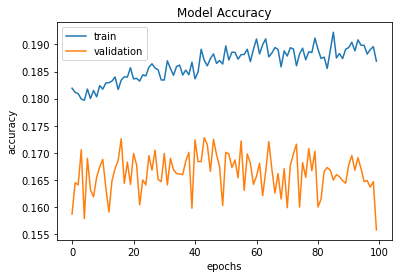

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','validation'],loc='upper_left')

In [14]:
score = Model.evaluate(x_test,y_test,verbose = 1)

313/313 [==============================] - 1s 3ms/step - loss: 3.7224 - accuracy: 0.1558


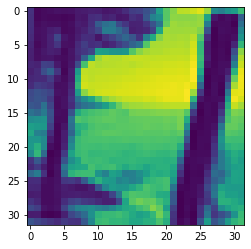

tulip


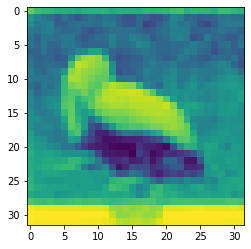

bed


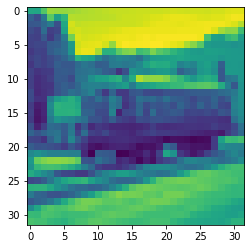

house


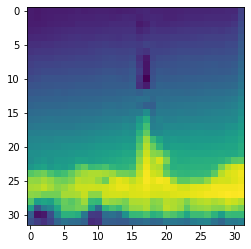

cloud


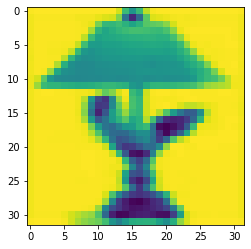

lamp


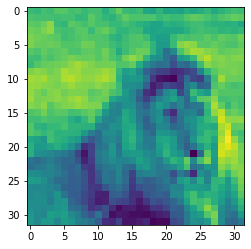

skyscraper


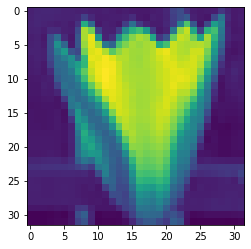

bowl


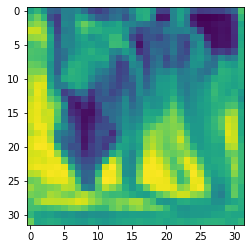

woman


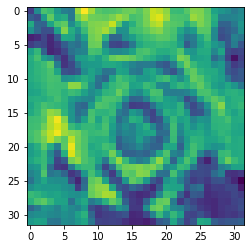

dolphin


In [12]:
import matplotlib.pyplot as plt
import numpy as np
Label = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']
y_predict = Model.predict(x_test)
for i in range(9):
    plt.imshow(x[i+10])
    plt.show()
    #print(np.round(y_predict[i]))
    print(Label[np.argmax(y_predict[i+10])])